In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.drop(columns='id',inplace=True)
test.drop(columns='id',inplace=True)

In [5]:
print(train.isna().sum())
print('----------------')
print(test.isna().sum())

keyword       61
location    2533
text           0
target         0
dtype: int64
----------------
keyword       26
location    1105
text           0
dtype: int64


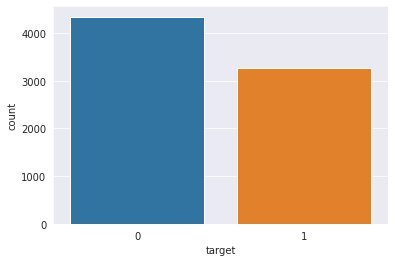

In [6]:
sns.countplot(train['target'])

In [7]:
train['keyword'].fillna('None',inplace=True)
test['keyword'].fillna('None',inplace=True)

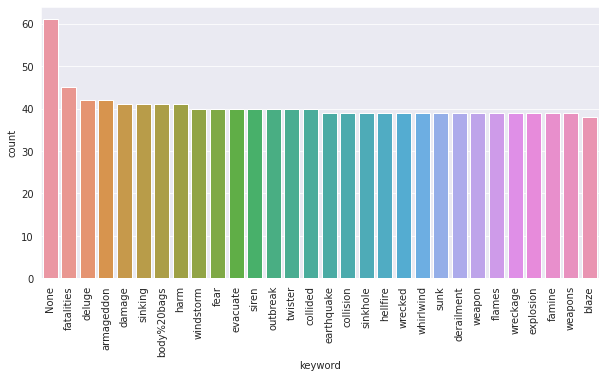

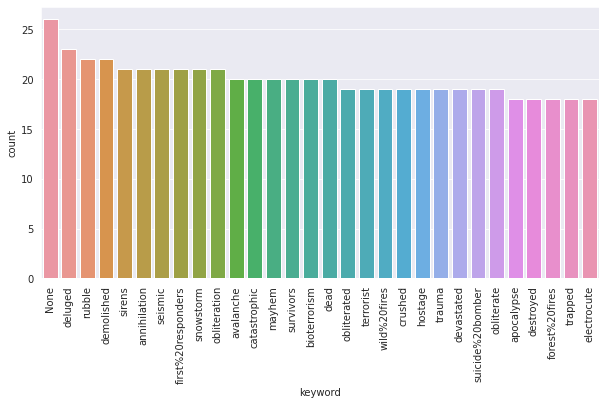

In [8]:
# plotting top 30 keywords in the tweet (train and test)
x = [train,test]
for y in x:
  plt.figure(figsize=(10,5))
  sns.countplot(y['keyword'],order=y['keyword'].value_counts().iloc[:30].index)
  plt.xticks(rotation=90)
  plt.show()

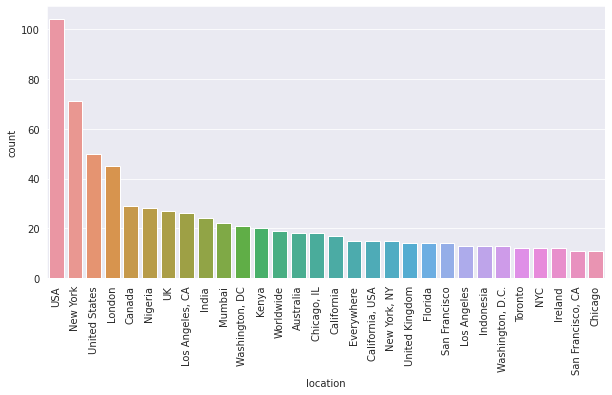

In [9]:
# plotting top 30 locations in the tweet (train)
plt.figure(figsize=(10,5))
sns.countplot(train['location'],order=train['location'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

USA and United States appearing . Merging them into one. Similarly for others.

In [10]:
#Categorizing locations other than the top 30 as Others
popular_loc = train['location'].value_counts().iloc[:30].index
for x in range(len(train)):
  if train['location'][x] not in popular_loc:
      train.replace(train['location'][x],'Others',inplace=True)

In [11]:
train.replace('United States','USA',inplace=True)
train.replace('New York, NY','New York',inplace=True)
train.replace('United Kingdom','UK',inplace=True)
train.replace('Everywhere','Worldwide',inplace=True)
train.replace('California, USA','California',inplace=True)
train.replace('Washington, D.C.','Washington, DC',inplace=True)
train.replace('Chicago, IL','Chicago',inplace=True)
train.replace('San Francisco, CA','San Francisco',inplace=True)
train.replace('Los Angeles, CA','Los Angeles',inplace=True)
train.replace('NYC','New York',inplace=True)

In [12]:
train['location'].unique()

array(['Others', 'India', 'USA', 'San Francisco', 'UK', 'Australia',
       'Indonesia', 'Canada', 'Toronto', 'Mumbai', 'New York', 'London',
       'California', 'Worldwide', 'Washington, DC', 'Los Angeles',
       'Chicago', 'Ireland', 'Nigeria', 'Florida', 'Kenya'], dtype=object)

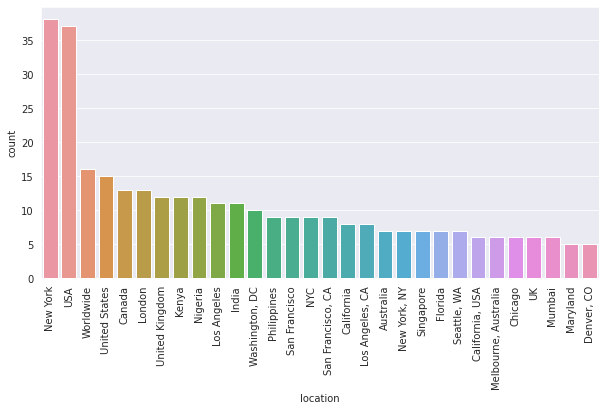

In [13]:
# plotting top 30 locations in the tweet (test)
plt.figure(figsize=(10,5))
sns.countplot(test['location'],order=test['location'].value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

In [14]:
#Categorizing locations other than the top 30 of the original train set as Others
for x in range(len(test)):
  if test['location'][x] not in popular_loc:
      test.replace(test['location'][x],'Others',inplace=True)

In [15]:
test.replace('United States','USA',inplace=True)
test.replace('New York, NY','New York',inplace=True)
test.replace('United Kingdom','UK',inplace=True)
test.replace('Everywhere','Worldwide',inplace=True)
test.replace('California, USA','California',inplace=True)
test.replace('Washington, D.C.','Washington, DC',inplace=True)
test.replace('Chicago, IL','Chicago',inplace=True)
test.replace('San Francisco, CA','San Francisco',inplace=True)
test.replace('Los Angeles, CA','Los Angeles',inplace=True)
test.replace('NYC','New York',inplace=True)

In [16]:
test['location'].unique()

array(['Others', 'London', 'India', 'USA', 'California', 'UK', 'New York',
       'Worldwide', 'Chicago', 'Los Angeles', 'San Francisco',
       'Indonesia', 'Australia', 'Florida', 'Canada', 'Nigeria',
       'Washington, DC', 'Mumbai', 'Ireland', 'Toronto', 'Kenya'],
      dtype=object)

In [17]:
# import re
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus=[]

# # remove '#' handle
# train['tweet'] = np.vectorize(remove_pattern)(train['text'], "#[\w]*")
# test['tweet'] = np.vectorize(remove_pattern)(test['text'], "#[\w]*") 
# train.head()

#Delete everything except alphabet
train['tweet'] = train['text'].str.replace("[^a-zA-Z#]", " ")
test['tweet'] = test['text'].str.replace("[^a-zA-Z#]", " ")
train.head()

#Dropping words whose length is less than 3
train['tweet'] = train['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['tweet'] = test['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train.head()

#convert all the words into lower case
train['tweet'] = train['tweet'].str.lower()
test['tweet'] = test['tweet'].str.lower()

train.drop(columns='text',inplace=True)
test.drop(columns='text',inplace=True)

In [18]:
train = pd.get_dummies(train,columns=['location','keyword'],drop_first=True)
test = pd.get_dummies(test,columns=['location','keyword'],drop_first=True)

In [19]:
train.head()

,target,tweet,location_California,location_Canada,location_Chicago,location_Florida,location_India,location_Indonesia,location_Ireland,location_Kenya,location_London,location_Los Angeles,location_Mumbai,location_New York,location_Nigeria,location_Others,location_San Francisco,location_Toronto,location_UK,location_USA,"location_Washington, DC",location_Worldwide,keyword_ablaze,keyword_accident,keyword_aftershock,keyword_airplane%20accident,keyword_ambulance,keyword_annihilated,keyword_annihilation,keyword_apocalypse,keyword_armageddon,keyword_army,keyword_arson,keyword_arsonist,keyword_attack,keyword_attacked,keyword_avalanche,keyword_battle,keyword_bioterror,keyword_bioterrorism,...,keyword_snowstorm,keyword_storm,keyword_stretcher,keyword_structural%20failure,keyword_suicide%20bomb,keyword_suicide%20bomber,keyword_suicide%20bombing,keyword_sunk,keyword_survive,keyword_survived,keyword_survivors,keyword_terrorism,keyword_terrorist,keyword_threat,keyword_thunder,keyword_thunderstorm,keyword_tornado,keyword_tragedy,keyword_trapped,keyword_trauma,keyword_traumatised,keyword_trouble,keyword_tsunami,keyword_twister,keyword_typhoon,keyword_upheaval,keyword_violent%20storm,keyword_volcano,keyword_war%20zone,keyword_weapon,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,1,deeds reason this #earthquake allah forgive,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,forest fire near ronge sask canada,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,residents asked shelter place being notified o...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,people receive #wildfires evacuation orders ca...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,just sent this photo from ruby #alaska smoke f...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
corpus_test=[]

ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

for i in range(len(train['target'])):
  review = re.sub('[^a-zA-Z]',' ',train['tweet'][i])
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

for i in range(len(test['tweet'])):
  review = re.sub('[^a-zA-Z]',' ',test['tweet'][i])
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_test.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
print(corpus)

['deed reason earthquak allah forgiv', 'forest fire near rong sask canada', 'resid ask shelter place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'sent photo rubi alaska smoke wildfir pour school', 'rockyfir updat california close direct lake counti fire cafir wildfir', 'flood disast heavi rain caus flash flood street manit colorado spring area', 'hill fire wood', 'emerg evacu happen build across street', 'afraid tornado come area', 'three peopl die heat wave', 'haha south tampa get flood wait second live south tampa gonna gonna fvck flood', 'rain flood florida tampabay tampa day lost count', 'flood bago myanmar arriv bago', 'damag school multi crash break', '', 'love fruit', 'summer love', 'fast', 'goooooooaaaaaal', 'ridicul', 'london cool', 'love ski', 'wonder', 'looooool', 'shit', 'last week', 'love girlfriend', 'cooool', 'like pasta', '', 'bbcmtd wholesal market ablaz http lhyxeohi', 'alway bring heavi metal http xngw', 'africanbaz 

In [22]:
len(corpus)

7613

In [23]:
#Creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
x_train = cv.fit_transform(corpus).toarray()
y_train = train['target']

x_test = cv.fit_transform(corpus_test).toarray()

In [24]:
#adding location and keywords column
x_train = np.concatenate((x_train,train.iloc[:,2:]),axis=1)
x_test = np.concatenate((x_test,test.iloc[:,1:]),axis=1)

In [25]:
#splitting the train dataset
from sklearn.model_selection import train_test_split
x_train_1,x_val,y_train_1,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
#Model training
models = [GaussianNB(),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors=3),
          DecisionTreeClassifier(),
          SVC(),
          RandomForestClassifier(n_estimators=30)]
for i in models:
  i.fit(x_train_1,y_train_1)
  y_pred = i.predict(x_val)
  print(i.__class__.__name__)
  print('\nConfusion Matrix:')
  print(confusion_matrix(y_val,y_pred))
  print('\nAccuracy:')
  print(accuracy_score(y_val,y_pred))
  print('\nClassification Report:')
  print(classification_report(y_val,y_pred))
  print('------------------------------------------------------')

GaussianNB

Confusion Matrix:
[[665 190]
 [164 504]]

Accuracy:
0.767564018384767

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       855
           1       0.73      0.75      0.74       668

    accuracy                           0.77      1523
   macro avg       0.76      0.77      0.76      1523
weighted avg       0.77      0.77      0.77      1523

------------------------------------------------------
LogisticRegression

Confusion Matrix:
[[763  92]
 [188 480]]

Accuracy:
0.8161523309258043

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       855
           1       0.84      0.72      0.77       668

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.81      1523

------------------------------------------------------
KNeighborsClass

In [ ]:
import tensorflow as tf
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Dense(units=6,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=6,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit(x_train_1,y_train_1,epochs=100)

In [34]:
y_pred = cnn.predict(x_val)
y_pred = y_pred>0.5
print('Neural Network')
print('\nConfusion Matrix:')
print(confusion_matrix(y_val,y_pred))
print('\nAccuracy:')
print(accuracy_score(y_val,y_pred))
print('\nClassification Report:')
print(classification_report(y_val,y_pred))

Neural Network

Confusion Matrix:
[[683 172]
 [200 468]]

Accuracy:
0.7557452396585687

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       855
           1       0.73      0.70      0.72       668

    accuracy                           0.76      1523
   macro avg       0.75      0.75      0.75      1523
weighted avg       0.75      0.76      0.76      1523



In [36]:
#Therefore selecting SVC model
classifier = SVC()
classifier.fit(x_train_1,y_train_1)
y_pred = classifier.predict(x_test)

In [38]:
sample_submission = pd.read_csv("sample_submission.csv")
result = pd.DataFrame({'id':sample_submission['id'],'target':y_pred})
result.to_csv('my_submission.csv',index=False)